In [102]:
import cv2 
import numpy as np

def generate_edges(image: np.ndarray, reduce_factor = 1, blur_size = 5) -> np.ndarray:
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    width, height = image.shape
    image_resized = cv2.resize(image, (height//reduce_factor, width//reduce_factor))
    blurred_image = cv2.GaussianBlur(image_resized, (blur_size, blur_size), 0)
    edges = cv2.Canny(blurred_image, threshold1=70, threshold2=200)//255

    return edges
    

In [103]:
image = cv2.imread('images/car.jpg')
edges = generate_edges(image)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

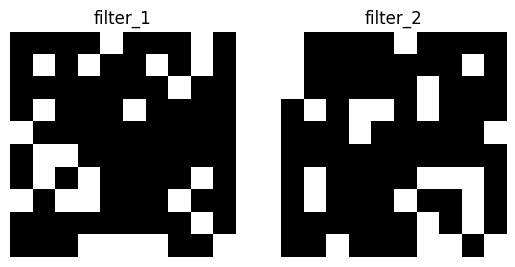

In [234]:
def generate_filters(filter_size, ratio):
    if filter_size <= 2:
        filter_size = 3 

    total_elements = filter_size * filter_size

    num_ones = int(total_elements * ratio)
    num_zeros = total_elements - num_ones

    filter_array = [1] * num_ones + [0] * num_zeros

    np.random.shuffle(filter_array)
    filter_array_1 = np.array(filter_array).reshape(filter_size, filter_size)

    np.random.shuffle(filter_array)
    filter_array_2 = np.array(filter_array).reshape(filter_size, filter_size)

    return filter_array_1, filter_array_2

filter_1, filter_2 = generate_filters(10, 0.25)

plt.subplot(1, 2, 1)
plt.title('filter_1')
plt.axis('off')
plt.imshow(filter_1, cmap="gray")

plt.subplot(1, 2, 2)
plt.title('filter_2')
plt.axis('off')
plt.imshow(filter_2, cmap="gray")

In [235]:
def _alter_edges(filter_shape:int, edges):
    edges_height, edges_width = edges.shape[:2]
    row_to_add = (filter_shape - (edges_height % filter_shape)) % filter_shape

    if row_to_add != 0:
        zero_row = np.zeros((row_to_add, edges_width), dtype=np.uint8)
        edges = np.vstack((zero_row, edges))
    edges_height, edges_width = edges.shape[:2]

    column_to_add = (filter_shape - (edges_width % filter_shape)) % filter_shape
    if column_to_add != 0:
        zero_column = np.zeros((edges_height, column_to_add), dtype=np.uint8) 
        edges = np.hstack((zero_column, edges))
    
    return edges


In [216]:
import numpy as np

# Assume filter_1 and edges are defined
filter_shape = filter_1.shape[0]
edges_height, edges_width = edges.shape[:2]

row_to_add = (filter_shape - (edges_height % filter_shape)) % filter_shape
print(f"Rows to add: {row_to_add}")

if row_to_add != 0:
    zero_row = np.zeros((row_to_add, edges_width), dtype=np.uint8)  # Create the correct shape for zero rows
    edges = np.vstack((zero_row, edges))  # Stack zero rows on top

# After adding rows, check the height again
edges_height, edges_width = edges.shape[:2]  # Update after potential change

column_to_add = (filter_shape - (edges_width % filter_shape)) % filter_shape
print(f"Columns to add: {column_to_add}")

if column_to_add != 0:
    zero_column = np.zeros((edges_height, column_to_add), dtype=np.uint8)  # Correct shape for zero columns
    edges = np.hstack((zero_column, edges))  # Stack zero columns on the left

print(f"New edges shape: {edges.shape}")

new_edges_height, new_edges_width = edges.shape[:2]


Rows to add: 9
Columns to add: 7
New edges shape: (380, 630)


In [217]:
for row in range(0, new_edges_height, filter_shape): 
    for col in range(0, new_edges_width, filter_shape): 
        if row + filter_shape <= new_edges_height and col + filter_shape <= new_edges_width:
            slice = edges[row: row + filter_shape, col: col + filter_shape]
            if row % 2 == 0:
                edges[row: row + filter_shape, col: col + filter_shape] = slice * filter_1
            else:
                edges[row: row + filter_shape, col: col + filter_shape] = slice * filter_2


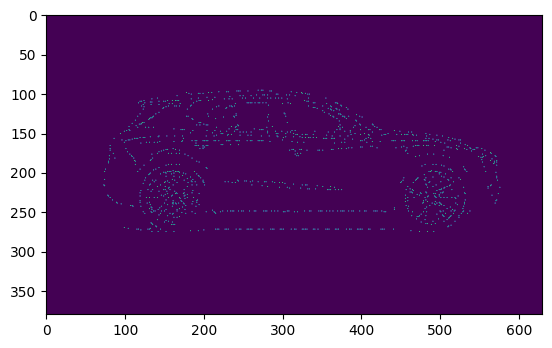

In [218]:
plt.imshow(edges)

In [186]:
edges[100:110, 100:110]

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

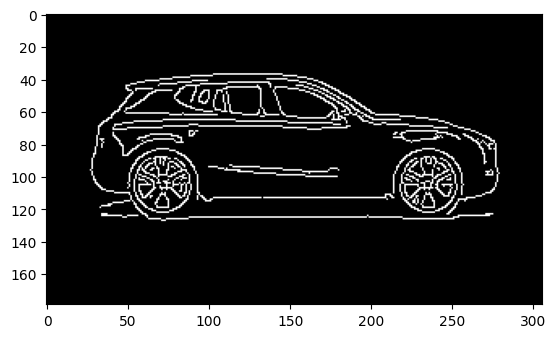

In [1]:
from generate_edges import EdgeGeneration
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/car.jpg')

gen_edge = EdgeGeneration(image)

edges = gen_edge.generate_edges(reduce_factor=2)
plt.imshow(edges, cmap="gray")

In [2]:
gen_edge.generate_filters_checkered(5)

(array([[0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0]]),
 array([[1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1],
        [0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1]]))

In [2]:
# gen_edge.generate_filters(5, 0.9)

(array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 0, 0]]),
 array([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 0, 0]]))

8007


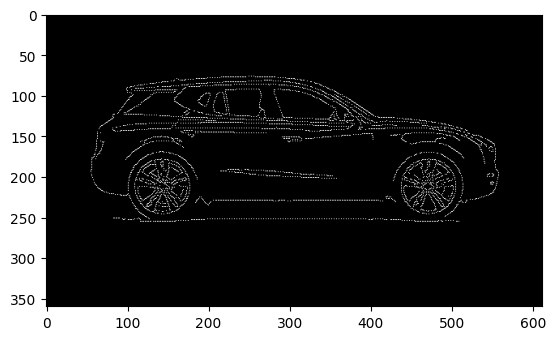

In [10]:
edges = gen_edge.generate_edges(reduce_factor=1)
plt.imshow(edges, cmap="gray")

gen_edge.generate_filters_checkered(2)
print(gen_edge.edges.sum())
plt.imshow(gen_edge.step(), cmap="gray")

In [12]:
gen_edge.edges.shape

(360, 612)

Sum of edges: 31242
15556


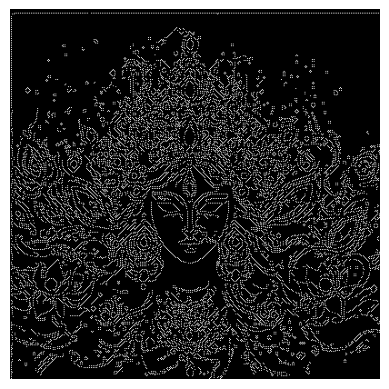

In [65]:
import numpy as np
from generate_edges import EdgeGeneration
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('images/random2.jpeg')

# Create an instance of EdgeGeneration
gen_edge = EdgeGeneration(image)

# Generate edges with a reduce factor of 10
edges = gen_edge.generate_edges(reduce_factor=1, blur_size=1)

# Generate filters and check edges sum
gen_edge.generate_filters_checkered(100)
print("Sum of edges:", gen_edge.edges.sum())

# Get the dimensions of the edges array
x, y = gen_edge.edges.shape

# Create a larger canvas for circles, scaled by the reduce factor
scale_factor = 3  # The factor by which the image was reduced
colored_image = np.zeros((x * scale_factor, y * scale_factor, 3), dtype=np.uint8)
            

def checkerboard(boardsize, squaresize):
    return np.fromfunction(lambda i, j: (i//squaresize[0])%2 != (j//squaresize[1])%2, boardsize).astype(int)

check = checkerboard((gen_edge.edges.shape[0], gen_edge.edges.shape[1]), (1,1))

final = gen_edge.edges * check[:gen_edge.edges.shape[0], :gen_edge.edges.shape[1]]
print(final.sum())

plt.imshow(final, cmap="gray")


# Display the image with drawn circles
plt.imshow(final, cmap="gray")
plt.axis('off')
plt.show()


In [45]:
final

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

15495


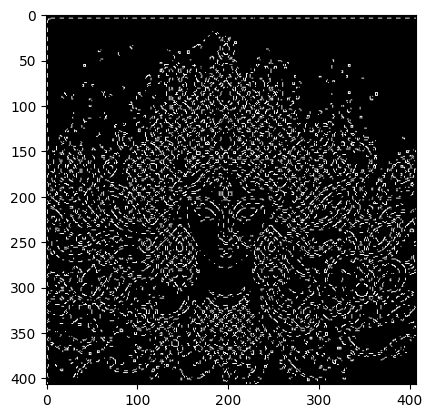

In [29]:
check = checkerboard((gen_edge.edges.shape[0], gen_edge.edges.shape[1]), (5,5))

final = gen_edge.edges * check[:gen_edge.edges.shape[0], :gen_edge.edges.shape[1]]
print(final.sum())

plt.imshow(final, cmap="gray")

In [54]:
array = np.array([[0, 0, 0],
                  [0, 1, 0],
                  [0, 0, 1]])
new_array = []
for i in range(len(array)):
    temp_array = []
    for j in range(len(array[i])):
        if array[i][j] == 1:
            temp_array.append(i+j)
        else:
            temp_array.append(0)
    new_array.append(temp_array)
np.array(new_array)

000

020

004



array([[0, 0, 0],
       [0, 2, 0],
       [0, 0, 4]])

In [56]:
import numpy as np

# Example array
array = final

# Create a file to store the coordinates
with open('coordinates.txt', 'w') as f:
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            if array[i, j] == 1:
                f.write(f"{i} {j} 0\n")  # z is set to 0, you can adjust it as needed
